In [1]:
import torch
from torch import nn # neural networks
import matplotlib.pyplot as plt
import torch.version
import numpy as np

# check pytorch version
print(torch.__version__)

weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

# extra bracket required for the model
X = torch.arange(start, end, step).unsqueeze(dim=1)

# linear regression basic formula
y = weight * X + bias

# 80% of data is being used for training split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

# function to plot data and predictions
def plot_prediction(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
    plt.figure(figsize=(10, 7))

    # plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="training data")

    # plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="testing data")

    # check for predictions
    if predictions is not None:
        # plot predictions if they exist
        plt.scatter(test_data, predictions, c="r", s=4, label="predictions")

    # to show legends
    plt.legend(prop={"size": 14})

# create linear regression model class
class LinearRegressionModel(nn.Module): # almost everything in pytorch inherits from nn.module
    def __init__(self):
        super().__init__()

        # initialize model parameters, we won't be doing it in complex datasets 
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True, # default it is true
                                                dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float)) # this is float 32
        
    # forward method to define the computation in the model
    def forward(self, x: torch.tensor) -> torch.Tensor: # x is the input data ,arrows means returns a torch.tensor
        return torch.sigmoid(self.weights * x + self.bias) # sigmoid makes output stay between 0 and 1

# create a random seed
torch.manual_seed(69)

# create instance of the model created (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# check out parameters
print(list(model_0.parameters()))


2.6.0+cu126
[Parameter containing:
tensor([-0.5259], requires_grad=True), Parameter containing:
tensor([-2.6043], requires_grad=True)]


from here on we write code line by line just like mentioned in the tutorial 

In [2]:
with torch.inference_mode():#torch.no_grad() also does the job but inference is preffered
    y_preds=model_0(X_test)*10
    y_preds= y_preds.flip(0)

y_preds

tensor([[0.4230],
        [0.4273],
        [0.4316],
        [0.4360],
        [0.4404],
        [0.4449],
        [0.4494],
        [0.4539],
        [0.4585],
        [0.4631]])

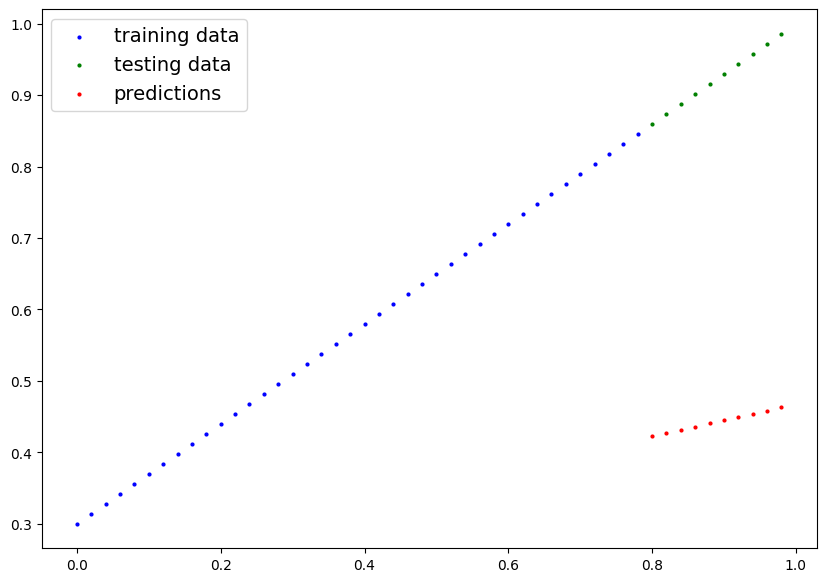

In [3]:
plot_prediction(predictions=y_preds)

the whole idea of training is for a model to move from some unknown parameters to known parameters, write now we are getting shitty predictions on the graph 

one way to measure the error in predictions is to use loss function/cost function/criterion

In [4]:
model_0.state_dict()

OrderedDict([('weights', tensor([-0.5259])), ('bias', tensor([-2.6043]))])

now we setup loss function and optimizer

there are lots of loss function , we will use L1loss , a common loss function (this is mean absolute error)

In [5]:
#setup a loss functions 
loss_fn=nn.L1Loss()#aim is to minimize the distance between the prediction and actual line 

#setup an optimizer(stochastic gradient descent)
optimizer=torch.optim.SGD(params=model_0.parameters(),
                         lr=0.01)#learning rate = possibly the most important hyper parameter you can set
# large learning rate :- large change in parameters


there will be different optimizer and loss functions according to the problem statement
THIS CODE DEMONSTRATES GRADIENT DESCENT

In [6]:
#possibly y_preds changed to y_pred
torch.manual_seed(69)
#building a training loop in pytorch and a testing loop 
#an epoch is one loop through the data(this is a hyperparamter)
epochs = 1000

#track different values 
epoch_count= []
loss_values = []
test_loss_values=[]

## Training 
#0. loop through the data 
for epoch in range(epochs):
    #set the model to training mode
    model_0.train() # train mode in pytorch sets all parameters that require gradients 
    #1. Forward pass
    y_pred=model_0(X_train)
    
    #2. Calculate the loss 
    loss=loss_fn(y_pred,y_train) # input first target next
    
    #3. Optimizer zero grad or basically zeroes it 
    optimizer.zero_grad()
    
    #4 Perform backpropagating on the loss with respect to the parameters of the model 
    loss.backward()
    
    #5. Step the optimizer (perform gradient descent )
    optimizer.step()

    #testing
    model_0.eval()#turns out settings not needed other than evaluations
    with torch.inference_mode():#turns off gradient tracking and more things related
        #1. do forward pass
        test_pred=model_0(X_test)

        #2. calculate the loss
        test_loss = loss_fn(test_pred,y_test)

    #print out what's happening 
    if epoch % 100 ==0:
        epoch_count.append(epoch)
        loss_values.append(loss)#mean absolute error 
        test_loss_values.append(test_loss)
        print(f"Epock: {epoch} | Loss: {loss} | test loss: {test_loss}")
    #print out model state dict
print(model_0.state_dict())

Epock: 0 | Loss: 0.5158294439315796 | test loss: 0.8786882162094116
Epock: 100 | Loss: 0.5123541355133057 | test loss: 0.8754749298095703
Epock: 200 | Loss: 0.5084581971168518 | test loss: 0.8718303442001343
Epock: 300 | Loss: 0.5040650963783264 | test loss: 0.8676695823669434
Epock: 400 | Loss: 0.4990796148777008 | test loss: 0.862885594367981
Epock: 500 | Loss: 0.49338197708129883 | test loss: 0.8573417663574219
Epock: 600 | Loss: 0.4868202209472656 | test loss: 0.8508626222610474
Epock: 700 | Loss: 0.4792000353336334 | test loss: 0.8432193994522095
Epock: 800 | Loss: 0.4702697694301605 | test loss: 0.8341116905212402
Epock: 900 | Loss: 0.45970049500465393 | test loss: 0.8231398463249207
OrderedDict({'weights': tensor([-0.2424]), 'bias': tensor([-1.8440])})


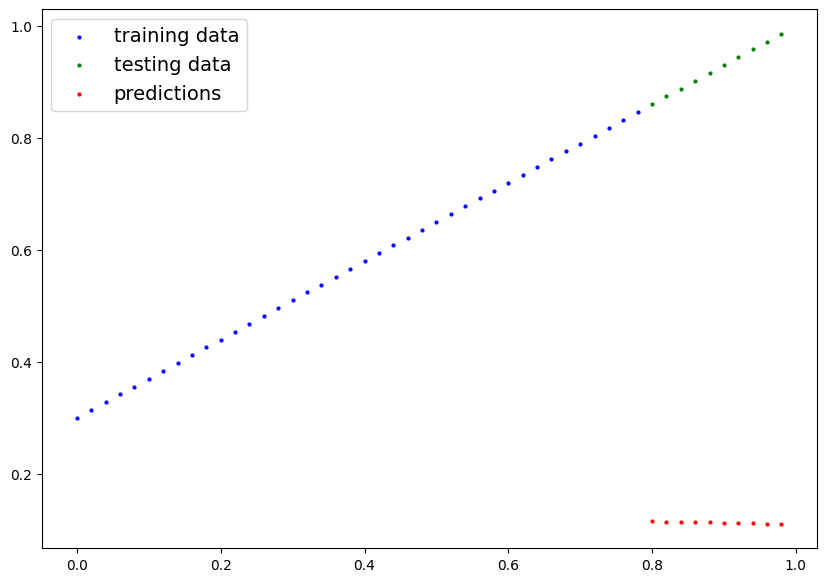

In [7]:
with torch.inference_mode(): #turns off evaulations and train mode
    y_preds_new=model_0(X_test)
    plot_prediction(predictions=y_preds_new)

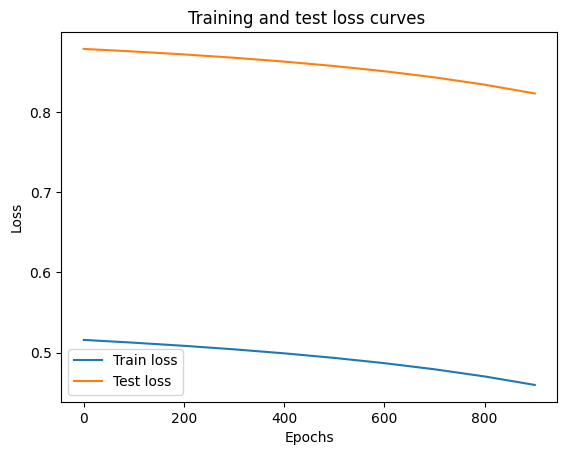

In [8]:
#plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves ")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

saving a model in pytorch 

In [9]:
#saving out pytorch model 
from pathlib import Path

#1 create a model directory 
model_path= Path("modls")
model_path.mkdir(parents=True, exist_ok=True)

2. #create model save path 
model_name="type_01_prototype.pth"#pytorch objec extension .pth or .pt
model_save_path=model_path/model_name

model_save_path

#3. save the model state_dict
print(f"saving model to {model_save_path}")
torch.save(obj=model_0.state_dict(),
           f=model_save_path)

saving model to modls\type_01_prototype.pth


In [10]:
##loading a pytorch model , since we saved out model's state dict rather than an entire model , we just need to create a new instance or model class and load the saved state_dict into that 

#1. make instance
loaded_model_0= LinearRegressionModel()

#2. load the saved state dict , this will update the instance with the parameters
loaded_model_0.load_state_dict(torch.load(f=model_save_path))#we didn't have to write torch.nn etc because linearreg is a subclass of it

loaded_model_0.state_dict()

OrderedDict([('weights', tensor([-0.2424])), ('bias', tensor([-1.8440]))])

In [11]:
#make predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds=loaded_model_0(X_test)

loaded_model_preds

tensor([[0.1153],
        [0.1148],
        [0.1143],
        [0.1138],
        [0.1133],
        [0.1128],
        [0.1123],
        [0.1119],
        [0.1114],
        [0.1109]])